<a href="https://colab.research.google.com/github/rich-descombaz/colab/blob/master/IBM_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IBM Attrition with Boosted Trees
Roughly based off of Tensorflow documentation https://www.tensorflow.org/tutorials/estimator/boosted_trees_model_understanding

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [75]:
# Make sure we're using Tensorflow 2.+ if necessary
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)


2.1.0


In [0]:
!pip uninstall tensorflow  ## if using below 2.0

In [0]:
## Install for the update Tensor Flow
pip install tensorflow 

In [141]:
print(tf.__version__)

2.1.0


Get the IBM data set at https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset unzip and
and upload it to your workspace. <br />
Open The files tab in the right (in colab) right click to copy the path. <br />
/content/WA_Fn-UseC_-HR-Employee-Attrition.csv
 


In [0]:
url = '/content/drive/My Drive/data/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df1 = pd.read_csv(url)

# Dataset is now stored in a Pandas Dataframe

In [143]:
#show the head of the data from, or click on your file in the explorer on
# on the right 
df1.head #shows the top rows
 #gives a breakdown of the statiscal ranges for numeric values

<bound method NDFrame.head of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

In [144]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#List of the Columns

---



In [133]:
list(df1.columns) 

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

There are a lot of fields...  

In [145]:
df1.shape #1470 rows, 35 columns 

(1470, 35)

#Show *Attrition* Records

In [146]:
# Show Attrition records
df1["Attrition"]

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [147]:
# Checking the type to make a tranlsation
# It's a pandas.core.series.Series
type(df1.Attrition)

pandas.core.series.Series

In [0]:
## Let's make our target value a 1 or 0 for our clasifier
type(df1.Attrition)
df1.Attrition = pd.Series(map(lambda x: dict(Yes=1, No=0)[x],
              df1.Attrition.values.tolist()), df1.index)

In [149]:
# Shoe Attrition records
df1["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

#Split into training and testing sets

In [0]:
df_train, df_test =  train_test_split(df1, test_size=0.2) #Set 20$ for evaluation

In [151]:
df_train.shape #b=80% of the reords are being set  for training


(1176, 35)

In [153]:
1176/1470

0.8

In [152]:
df_test.shape # and 20% 

(294, 35)

 # Get the Target Value  - *Attrition*

In [154]:
type(df_train)

pandas.core.frame.DataFrame

In [156]:
df_train["Attrition"] #Here are the Attrition records still in the main pandas DataFrame

1148    0
147     0
1408    0
852     0
1250    0
       ..
192     1
628     0
649     0
954     0
630     0
Name: Attrition, Length: 1176, dtype: int64

In [0]:
y_train = df_train.pop("Attrition")
y_eval = df_test.pop("Attrition")

<br/>


##Take a look at the data

---



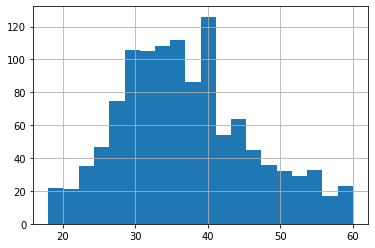

In [158]:
df_train["Age"].hist(bins=20)
plt.show()

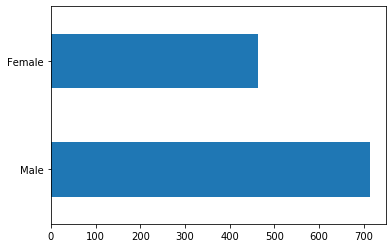

In [92]:
df_train["Gender"].value_counts().plot(kind='barh')
plt.show()

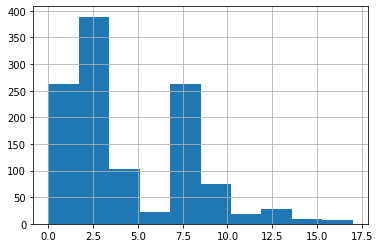

In [98]:
df_train["YearsWithCurrManager"].hist(bins=10)
plt.show()

Let's choose some features to analyze

In [0]:
list(df_train.columns) 

Remember, we remove Attrition, that is going to be out y value

We're going to make the category fields numeric <br />
Instead of Gender there will be columns Gender_male and Gender_female with values either 0 or 1 <br />
Note: our column count will be going up from 34 (after removing 'Attrition') to all of the variations of categories. For instance, like gender Business travel has categories Travel_Rarely, Travel_Frequently as well. <br />
### In Colab you can double click your data source and an inspector will open in the right paneld

In [49]:
type(y_train)


pandas.core.series.Series

In [0]:
type(y_eval)

pandas.core.series.Series

In [0]:
fc = tf.feature_column

CATEGORICAL_COLUMNS = ["BusinessTravel","Department", "JobInvolvement", "OverTime" ,"Gender"]
                       
NUMERIC_COLUMNS = ["Age", "DistanceFromHome", "DailyRate", "Education", 
                   "JobLevel", "PerformanceRating", "TotalWorkingYears", 
                   "YearsInCurrentRole", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]

def one_hot_cat_column(feature_name, vocab):
  return tf.feature_column.indicator_column(
      tf.feature_column.categorical_column_with_vocabulary_list(feature_name,
                                                 vocab))
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  # Need to one-hot encode categorical features.
  vocabulary = df_train[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,
                                           dtype=tf.float32))

Now we can look at the colums and see that the Categories have been expanded out

In [107]:
example = dict(df_train.head(1))
tf.keras.layers.DenseFeatures(feature_columns)(example).numpy()

array([[ 29.,   1.,   0.,   0., 738.,   1.,   0.,   0.,   9.,   5.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   3.,   4.,   3.,
          2.,   2.,   2.]], dtype=float32)

In [0]:

def make_input_func(X, y, n_epochs=None, shuffle=True):
  def input_func():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
      dataset = dataset.shuffle(len(y_train))
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = dataset.repeat(n_epochs)
    # In memory training doesn't use batching.
    dataset = dataset.batch(len(y_train))
    return dataset
  return input_func

# Training and evaluation input functions.
train_input_fn = make_input_func(df_train, y_train)
eval_input_fn = make_input_func(df_test, y_eval, shuffle=False, n_epochs=1)

In [118]:
# Since data fits into memory, use entire dataset per layer. It will be faster.
est = tf.estimator.BoostedTreesClassifier(feature_columns,
                                          n_batches_per_layer=1)

# The model will stop training once the specified number of trees is built, not
# based on the number of steps.
est.train(train_input_fn, max_steps=100)

# Eval.
result = est.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))

accuracy                  0.867347
accuracy_baseline         0.836735
auc                       0.788872
auc_precision_recall      0.516674
average_loss              0.358404
label/mean                0.163265
loss                      0.358404
precision                 0.695652
prediction/mean           0.158158
recall                    0.333333
global_step             100.000000
dtype: float64


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsbknvgdj/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


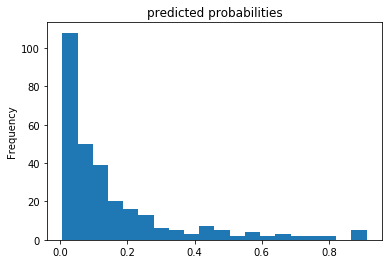

In [113]:
pred_dicts = list(est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')
plt.show()

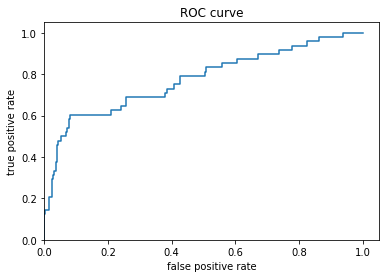

In [114]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [0]:
##OK, So, let's figure out which of the features had the greatest impact
pred_dicts = est.experimental_predict_with_explanations(eval_input_fn)

In [0]:
importances = est.experimental_feature_importances(normalize=True)

In [124]:
type(importances)

collections.OrderedDict

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns_colors = sns.color_palette('colorblind')

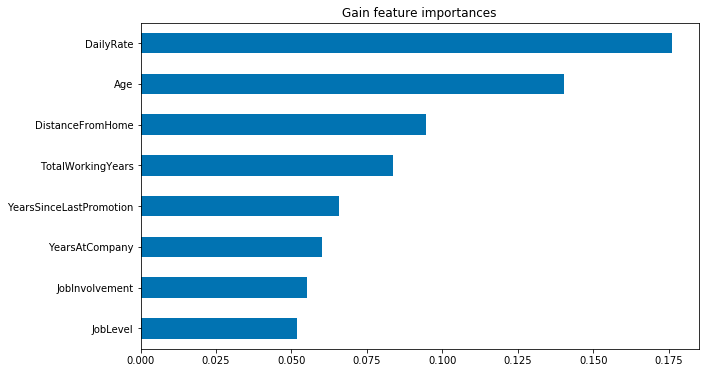

In [127]:

df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh',
          color=sns_colors[0],
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')